# Comparing data distributions

** We want to compare the different representations and meta-features of two distributions to characterize their similarities and differences (e.g. original data VS generated data). **

- Data format : autoML

In [93]:
data_dir = '../../data'

datasets = {'iris': (data_dir + '/iris', 'iris'),
            'iris_1': (data_dir + '/iris_1', 'iris'),
            'iris_2': (data_dir + '/iris_2', 'iris'),
            'mimic': (data_dir + '/mimic', 'mimic'),
            'mimic_artif': (data_dir + '/mimic', 'mimic_artif'),
            'mushrooms': (data_dir + '/mushrooms', 'mushrooms'),
            'mushrooms_gen_sam': (data_dir + '/mushrooms_gen_sam', 'mushrooms_gen_sam'),
            'chems': (data_dir + '/chems', 'chems'),
            'credit': (data_dir + '/credit_data', 'credit'),
            'squares': (data_dir + '/squares', 'squares'),
            'squares_2': (data_dir + '/squares_2', 'squares'),
            'titanic' : (data_dir + '/titanic', 'titanic'),
            'adult' : (data_dir + '/adult', 'adult'),
            'adult2' : (data_dir + '/adult2', 'adult2'),
            'adult_gen_sam' : (data_dir + '/adult_gen_sam', 'adult_gen_sam')}

# First dataset.
input_dir1, basename1 = datasets['adult2']
#input_dir1, basename1 = datasets['mimic']

# Second dataset.
input_dir2, basename2 = datasets['adult_gen_sam']
#input_dir2, basename2 = datasets['mimic_artif']

In [97]:
input_dir1, basename1 = '../../data/thomas_data', 'iris_sdv'
input_dir2, basename2 = '../../data/thomas_data/multivariate', 'iris_mg'

## Comparison

- ** Overall meta-features ** (descriptors): we compute simple distances between the descriptors of each dataset.
- ** Individual features/variables ** (column comparison):

    - Numerical:
        - Kolmogorov-Smirnov test
        
    - Categorical, binary:
        - Mutual information score: This is equal to the Kullback-Leibler divergence of the joint distribution with the product distribution of the marginals
        - Kullback-Leibler divergence
        - Jensen-Shannon divergence

- ** Discriminant ** (row comparison): we label the data with 0 or 1 according to their original dataset and then train a binary classifier on it. This is the method used to train GANs. More sophisticated the classifier which succeeds in separating the data is, more similar they are. If the classifier can't separate the data, maybe they are to similar, maybe the classifier isn't good enough. 
- ** Landmark: ** performance in prediction of the target among various models and metrics.
- ** Change of representations: ** we train an auto-encoder on dataset A and benchmark it on dataset B (and reciprocally). The intuition behind this is that similar data will be compressible in the same latent space. This principle could be applied to other changes of representation.
- ** Causal inference: ** comparison of causal inference results. Do we notice the same causal links between the variables?

Draft:
- Wasserstein distance (minimum cost of turning one "pile of dirt" into the other)
- Chi square
- Metrics of **privacy** and **resemblance** between two datasets:
    - Area under MDA curve with threshold
    - MMD

In [94]:
# AutoML
import sys
main_path = '../../'
sys.path.append(main_path + 'code/auto_ml')
sys.path.append(main_path + 'code/processing')
sys.path.append(main_path + 'code/functions')
sys.path.append(main_path + 'code/models')
sys.path.append(main_path + 'data')

%matplotlib inline
%reload_ext autoreload
%autoreload 2

from auto_ml import AutoML
from comparator import Comparator

### Read data

In [98]:
# From AutoML
ds1 = AutoML(input_dir1, basename1)
ds2 = AutoML(input_dir2, basename2)

In [85]:
# From CSV
ds1 = AutoML.from_csv(input_dir1, basename1, 'iris_sdv.csv')
ds2 = AutoML.from_csv(input_dir2, basename2, 'iris_mg.csv')

In [104]:
# Auto-comparator
print('ds1 train/test comparator')
auto_comparator = Comparator(ds1)

# Comparator
print('\nds1/ds2 comparator')
comparator = Comparator(ds1, ds2)

ds1 train/test comparator
1 dataset detected: comparison between train and test sets.

ds1/ds2 comparator
2 datasets detected: ready for comparison.


### Visualization

In [105]:
ds1.show_feat_type()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Type,Numerical,Numerical,Numerical,Numerical,Numerical,Numerical


### Processing

In [106]:
auto_comparator.process_data()
comparator.process_data()

### Distance between descriptors

In [110]:
comparator.compute_descriptors(norm='euclidean')
auto_comparator.show_descriptors()
print()
comparator.show_descriptors()

Ratio: 0.1875
Symb ratio: 0.0
Missing proba: 0.0
Skewness min: 0.9276952632771437
Skewness max: 0.0992951912816919
Skewness mean: 0.4017689869402316

Ratio: 0.0425
Symb ratio: 0.0
Missing proba: 0.0
Skewness min: 0.15428712820207052
Skewness max: 0.2995895135544852
Skewness mean: 0.08566123168271304


### Individual features comparison

In [111]:
auto_comparator.show_comparison_matrix()
comparator.show_comparison_matrix()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Kolmogorov-Smirnov,"(0.092, 0.983)","(0.208, 0.22)","(0.175, 0.418)","(0.2, 0.261)","(0.2, 0.261)","(0.183, 0.36)"


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Kolmogorov-Smirnov,"(0.073, 0.476)","(0.08, 0.355)","(0.097, 0.162)","(0.189, 0.0)","(0.162, 0.002)","(0.134, 0.017)"


### Binary classification scores

- Discrimination between ds1 train set and ds1 test set

In [112]:
auto_comparator.show_classifier_score()

from sklearn.ensemble import RandomForestClassifier
auto_comparator.show_classifier_score(clf=RandomForestClassifier(n_estimators=200))

from sklearn.neural_network import MLPClassifier
auto_comparator.show_classifier_score(clf=MLPClassifier(hidden_layer_sizes=(100, 100)))

/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


             precision    recall  f1-score   support

  Dataset 1       1.00      0.80      0.89        30
  Dataset 2       0.00      0.00      0.00         0

avg / total       1.00      0.80      0.89        30



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


             precision    recall  f1-score   support

  Dataset 1       0.96      0.92      

/usr/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- Discrimination between ds1 and ds2

In [113]:
comparator.show_classifier_score()

from sklearn.ensemble import RandomForestClassifier
comparator.show_classifier_score(clf=RandomForestClassifier(n_estimators=200))

from sklearn.neural_network import MLPClassifier
comparator.show_classifier_score(clf=MLPClassifier(hidden_layer_sizes=(100, 100)))

/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


             precision    recall  f1-score   support

  Dataset 1       0.00      0.00      0.00         0
  Dataset 2       1.00      0.87      0.93       230

avg / total       1.00      0.87      0.93       230



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


             precision    recall  f1-score   support

  Dataset 1       0.67      0.91      

### Privacy/Resemblance metric
- ** MDA: ** Minimum Distance Accumulation
- Privacy: Area above curve on the left of the threshold
- Resemblance: Area under curve on the right of the threshold

Nearest neighbors metric


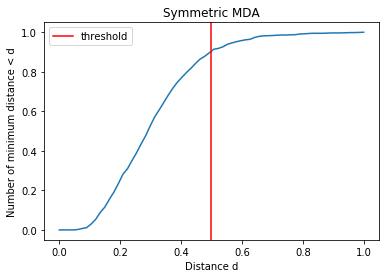

** Privacy: **0.61074955942654

** Resemblance: **0.9640266898752538

In [114]:
comparator.compute_mda(norm='manhattan', precision=0.1, threshold=0.5)
comparator.show_mda()

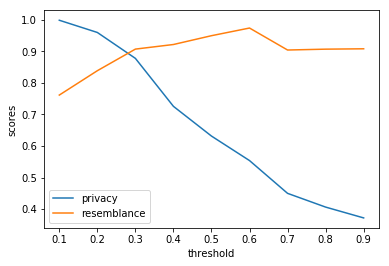

In [115]:
comparator.show_mda_threshold()

** MMD: ** Maximum Mean Discrepancy

### PCA plots

Explained variance ratio of the 6 components: 
 [0.71064419 0.16973054 0.06994701 0.02608172 0.01964116 0.00395537]
Explained variance ratio of the 6 components: 
 [0.72574976 0.1596503  0.06846336 0.02421601 0.01806113 0.00385944]


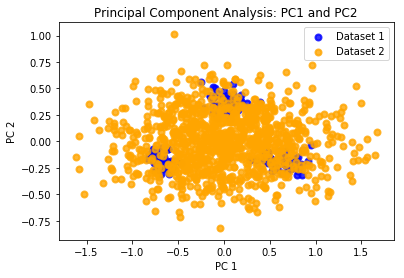

In [116]:
comparator.show_pca()

In [ ]:
#comparator.show_mmd()
# TODO

In [ ]:
# Only if same number of samples !
#comparator.dcov()

In [ ]:
# Only if same number of samples !
# Norm = 'l0',
#        'manhattan' or 'l1', 
#        'euclidean' or 'l2',
#        'minimum',
#        'maximum',
#comparator.datasets_distance(axis=0, norm='manhattan')